In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import pandas as pd

In [2]:
# reading and shuffling the data

difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values
myData = (df - df.min()) / (df.max() - df.min())

X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy() # strength
X2 = myData.iloc[:, 1:2].to_numpy() # temperature
Y = myData.iloc[:, -1:].to_numpy()

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [5]:
#setting parameters of the model

maxDegGD = 9
maxDegSGD = 9

iter_value = 500
iter_value += 1
skip_num = 50
iter_scaled= int(((iter_value-1)/skip_num)+1)

lamdaCountGD = 5
lamdaCountSGD = 5

lamdaCountGD += 1
lamdaCountSGD += 1

lamdaSegmentGD = 50
lamdaSegmentSGD = 50

learningRateGD = 0.1
learningRateSGD = 0.1

coeff_list_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, maxDegGD+1, maxDegGD+1))
coeff_list_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, maxDegSGD+1, maxDegSGD+1))

error_array_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, iter_scaled))
error_array_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, iter_scaled))

In [6]:
def Ridge_GD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    lamdaScaled = int(lamda*lamdaSegmentGD)
    
     # assigning random values for weights
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        sum_coeff = 0
        sum_coeff_square = 0
        eachIFErrorList = []
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]
                sum_coeff_square += A[m][n]**2

        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]                   # contains strength
            row2 = X2[z]                  # contains temperature
            column = Y[z]               # contains pressure
            eachIFError = 0            # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              

        sumItrError += (lamda/2) * sum_coeff_square
        sumItrError = (sumItrError/len(Y))**0.5
        
        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(Y)):
                    row1 = X1[z]
                    row2 = X2[z]
                    subSum += eachIFErrorList[z] * (row1**m) * (row2**n)
                A[m][n] -= (learning_rate/len(Y))  * (subSum + lamda * sum_coeff)

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_GD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)


        if(itr == iterations - 1): 
            print("\nError of end of iteration for lamda = ", lamda, "\n\t\t\t = " ,sumItrError)   
            
            for m in range(deg+1):                 
                for n in range(deg+1-m):
                    coeff_list_GD[deg][(lamdaScaled)][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMBDA =  0.02 

Error of  0  iteration =  [1.79350445]
Error of  50  iteration =  [0.38861381]
Error of  100  iteration =  [0.3315365]
Error of  150  iteration =  [0.29838868]
Error of  200  iteration =  [0.27705353]
Error of  250  iteration =  [0.2615689]
Error of  300  iteration =  [0.24910703]
Error of  350  iteration =  [0.23835885]
Error of  400  iteration =  [0.22871682]
Error of  450  iteration =  [0.21989116]
Error of  500  iteration =  [0.2117353]

Error of end of iteration for lamda =  0.02 
			 =  [0.2117353]


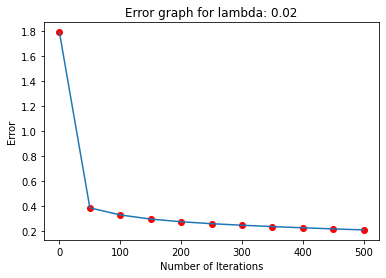

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.04 

Error of  0  iteration =  [0.91021824]
Error of  50  iteration =  [0.372551]
Error of  100  iteration =  [0.2745535]
Error of  150  iteration =  [0.22558392]
Error of  200  iteration =  [0.20125443]
Error of  250  iteration =  [0.18828601]
Error of  300  iteration =  [0.18036361]
Error of  350  iteration =  [0.17473468]
Error of  400  iteration =  [0.17023622]
Error of  450  iteration =  [0.16637337]
Error of  500  iteration =  [0.16292808]

Error of end of iteration for lamda =  0.04 
			 =  [0.16292808]


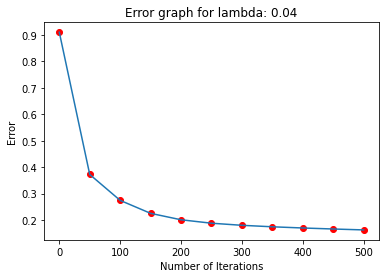

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.06 

Error of  0  iteration =  [0.71927882]
Error of  50  iteration =  [0.31703202]
Error of  100  iteration =  [0.23485726]
Error of  150  iteration =  [0.19931429]
Error of  200  iteration =  [0.18354708]
Error of  250  iteration =  [0.17520157]
Error of  300  iteration =  [0.16959479]
Error of  350  iteration =  [0.16511094]
Error of  400  iteration =  [0.16120311]
Error of  450  iteration =  [0.15767864]
Error of  500  iteration =  [0.154461]

Error of end of iteration for lamda =  0.06 
			 =  [0.154461]


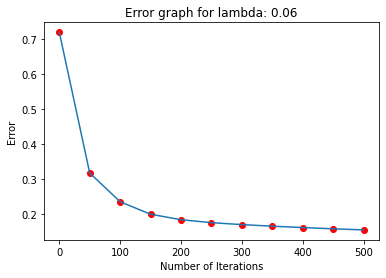

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.08 

Error of  0  iteration =  [0.87736502]
Error of  50  iteration =  [0.25467507]
Error of  100  iteration =  [0.230911]
Error of  150  iteration =  [0.21882842]
Error of  200  iteration =  [0.21070447]
Error of  250  iteration =  [0.20416751]
Error of  300  iteration =  [0.19842478]
Error of  350  iteration =  [0.19320326]
Error of  400  iteration =  [0.1883981]
Error of  450  iteration =  [0.18395909]
Error of  500  iteration =  [0.17985433]

Error of end of iteration for lamda =  0.08 
			 =  [0.17985433]


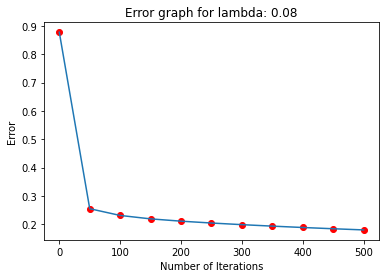

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

ERRORS FOR LAMBDA =  0.1 

Error of  0  iteration =  [2.08445925]
Error of  50  iteration =  [0.22935489]
Error of  100  iteration =  [0.19625765]
Error of  150  iteration =  [0.18081242]
Error of  200  iteration =  [0.17261878]
Error of  250  iteration =  [0.16789833]
Error of  300  iteration =  [0.164818]
Error of  350  iteration =  [0.16253036]
Error of  400  iteration =  [0.16065105]
Error of  450  iteration =  [0.15900543]
Error of  500  iteration =  [0.15751245]

Error of end of iteration for lamda =  0.1 
			 =  [0.15751245]


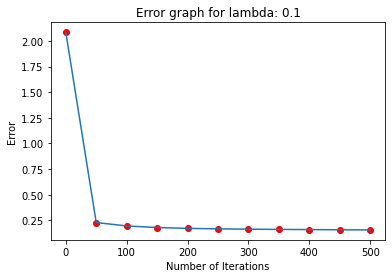

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


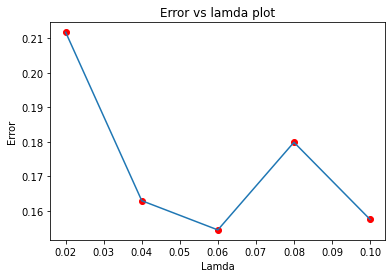


Lamda =  0.06  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
minErrorLamda = -1

x_axis_GD=[]
lamdaGD = []
lamdaErrorList = []

for i in range(lamdaCountGD):
    if i == 0:
        continue
    lamdaGD.append(i/lamdaSegmentGD)

for iterLamda in lamdaGD:
    
    lamdaScaled = int(iterLamda*lamdaSegmentGD)
    x_axis_GD=[]
    
    for i in range(iter_scaled):
        x_axis_GD.append(i*skip_num)
        
    for i in range(maxDegGD+1):
        if(i != maxDegGD):
            continue
            
        print("\nERRORS FOR LAMBDA = ", iterLamda, "\n")
        GD_Error = Ridge_GD(i, train_X1, train_X2, train_Y, iterLamda, learningRateGD , iter_value)
        lamdaErrorList.append(GD_Error)
        if(GD_Error <= minError):
            minError = GD_Error
            minErrorLamda = iterLamda

        error_list = error_array_GD[i][lamdaScaled].tolist()    #dont forget [lamda]
        
        plt.plot(x_axis_GD, error_list)
        plt.scatter(x_axis_GD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lambda: " + str(iterLamda)
        plt.title(title)
        plt.show()
        error_list=error_array_GD[i][lamdaScaled].tolist()
        print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.")  

In [8]:
def Predict_Ridge_GD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentGD)
    sum_coeff_square = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff_square += coeff_list_GD[deg][lamdaScaled][m][n]**2
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_GD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff_square * 0.5 
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING ERRORS FOR LAMDA =  0.02
Testing error =  [0.21902902] 

TESTING ERRORS FOR LAMDA =  0.04
Testing error =  [0.16872697] 

TESTING ERRORS FOR LAMDA =  0.06
Testing error =  [0.16111664] 

TESTING ERRORS FOR LAMDA =  0.08
Testing error =  [0.19171743] 

TESTING ERRORS FOR LAMDA =  0.1
Testing error =  [0.16867299] 



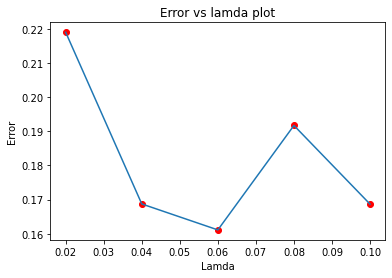


Lamda =  0.06  gives minimum error.


In [9]:
lamdaErrorList.clear()
for iterLamda in lamdaGD:
    for i in range(maxDegGD+1):
        if(i != maxDegGD):
            continue
        print("TESTING FOR LAMBDA = ", iterLamda)
        GD_Error = Predict_Ridge_GD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(GD_Error)
        if(GD_Error < minError):
            minError = GD_Error
            minErrorLamda = iterLamda

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()        
print("\nLambda = ", minErrorLamda, " gives minimum error.")  

In [10]:
def Ridge_SGD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    
    # assigning random values for weights
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sum_coeff = 0
        sum_coeff_square = 0
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]
                sum_coeff_square += A[m][n]**2
            
        sumItrError = 0
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]              # contains strength, temperature
            row2 = X2[z]
            column = Y[z]       # contains pressure
            
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
            
            # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):             # power of x2
                    A[m][n] -= (learning_rate/len(Y)) * (dotP_wx * (row1**m) * (row2**n) + lamda * sum_coeff) # calculating w0,w1,w2,... for each iteration
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]                  # contains strength, temperature
            row2 = X2[z]
            column = Y[z]
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                         # Summation of [(w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn]
            sumItrError +=  (dotP_wx**2)*0.5
            
        sumItrError =  (sumItrError + lamda * sum_coeff_square*0.5)
        sumItrError = (sumItrError/len(Y))**0.5
        
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_SGD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)
        
        if(itr == iterations - 1):
            print("\nError of last iteration for lamda = ", lamda, " \n\t\t\t = " ,sumItrError)
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list_SGD[deg][lamdaScaled][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMDA =  0.02 

Error of  0  iteration =  [0.60450509]
Error of  50  iteration =  [0.25430584]
Error of  100  iteration =  [0.24326494]
Error of  150  iteration =  [0.23626747]
Error of  200  iteration =  [0.22996091]
Error of  250  iteration =  [0.22414265]
Error of  300  iteration =  [0.21881207]
Error of  350  iteration =  [0.2139439]
Error of  400  iteration =  [0.20949947]
Error of  450  iteration =  [0.20543834]
Error of  500  iteration =  [0.20172231]

Error of last iteration for lamda =  0.02  
			 =  [0.20172231]


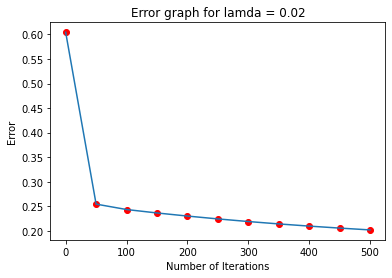


ERRORS FOR LAMDA =  0.04 

Error of  0  iteration =  [1.18904483]
Error of  50  iteration =  [0.24229272]
Error of  100  iteration =  [0.21401067]
Error of  150  iteration =  [0.19735045]
Error of  200  iteration =  [0.18640342]
Error of  250  iteration =  [0.17838463]
Error of  300  iteration =  [0.17200449]
Error of  350  iteration =  [0.16665665]
Error of  400  iteration =  [0.16204318]
Error of  450  iteration =  [0.15800476]
Error of  500  iteration =  [0.15444504]

Error of last iteration for lamda =  0.04  
			 =  [0.15444504]


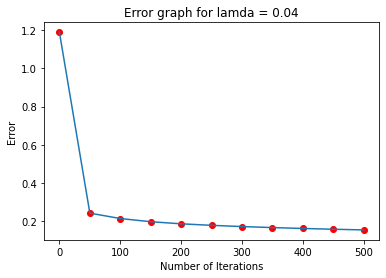


ERRORS FOR LAMDA =  0.06 

Error of  0  iteration =  [1.53087771]
Error of  50  iteration =  [0.30090675]
Error of  100  iteration =  [0.23512645]
Error of  150  iteration =  [0.22143842]
Error of  200  iteration =  [0.21184851]
Error of  250  iteration =  [0.20361255]
Error of  300  iteration =  [0.19640631]
Error of  350  iteration =  [0.1900484]
Error of  400  iteration =  [0.18441074]
Error of  450  iteration =  [0.17939892]
Error of  500  iteration =  [0.17493811]

Error of last iteration for lamda =  0.06  
			 =  [0.17493811]


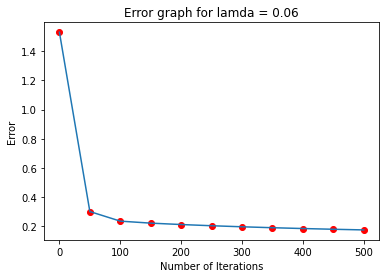


ERRORS FOR LAMDA =  0.08 

Error of  0  iteration =  [0.90916607]
Error of  50  iteration =  [0.30355669]
Error of  100  iteration =  [0.28368858]
Error of  150  iteration =  [0.2689778]
Error of  200  iteration =  [0.25650595]
Error of  250  iteration =  [0.24555736]
Error of  300  iteration =  [0.23580462]
Error of  350  iteration =  [0.22705774]
Error of  400  iteration =  [0.21918746]
Error of  450  iteration =  [0.21209441]
Error of  500  iteration =  [0.20569578]

Error of last iteration for lamda =  0.08  
			 =  [0.20569578]


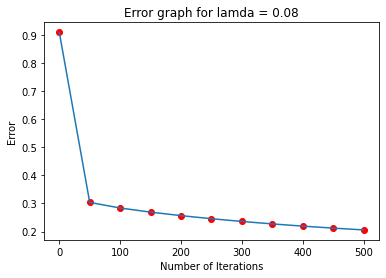


ERRORS FOR LAMDA =  0.1 

Error of  0  iteration =  [0.8829975]
Error of  50  iteration =  [0.2410669]
Error of  100  iteration =  [0.20769037]
Error of  150  iteration =  [0.19645267]
Error of  200  iteration =  [0.18951942]
Error of  250  iteration =  [0.18456424]
Error of  300  iteration =  [0.18070829]
Error of  350  iteration =  [0.17753081]
Error of  400  iteration =  [0.17482024]
Error of  450  iteration =  [0.17246195]
Error of  500  iteration =  [0.17038674]

Error of last iteration for lamda =  0.1  
			 =  [0.17038674]


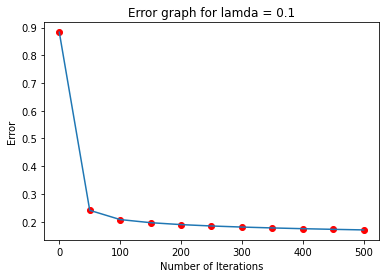

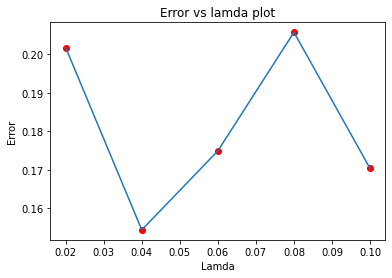


Lamda =  0.04  gives minimum error.


In [11]:
# For training data

minError = 100000
minErrorDeg = -1
x_axis_SGD=[]

lamdaSGD = []
lamdaErrorList.clear()

for i in range(lamdaCountSGD):
    if i == 0:
        continue
    lamdaSGD.append(i/lamdaSegmentSGD)
    
    
for i in range(iter_scaled):
    x_axis_SGD.append(i*skip_num)

for iterLamda in lamdaSGD:
    lamdaScaled = int(iterLamda*lamdaSegmentSGD)

    for i in range(maxDegSGD+1):
        if i != maxDegSGD:
            continue
        print("\nERRORS FOR LAMBDA = ", iterLamda, "\n")

        SGD_Error = Ridge_SGD(i, X1, X2, train_Y, iterLamda, learningRateSGD, iter_value)
        lamdaErrorList.append(SGD_Error)
        if(SGD_Error <= minError):
            minError = SGD_Error
            minErrorLamda = iterLamda
            
        error_list = error_array_SGD[i][lamdaScaled].tolist() 
        plt.plot(x_axis_SGD, error_list)
        plt.scatter(x_axis_SGD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lambda = " + str(iterLamda)
        plt.title(title)
        plt.show()

plt.plot(lamdaSGD, lamdaErrorList)
plt.scatter(lamdaSGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.")          

In [12]:
def Predict_Ridge_SGD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    sum_coeff_square = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff_square += coeff_list_SGD[deg][lamdaScaled][m][n]**2
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_SGD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff_square * 0.5      
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING ERROR FOR LAMDA =  0.02
Testing error =  [0.20536552] 

TESTING ERROR FOR LAMDA =  0.04
Testing error =  [0.15788434] 

TESTING ERROR FOR LAMDA =  0.06
Testing error =  [0.18126246] 

TESTING ERROR FOR LAMDA =  0.08
Testing error =  [0.21448299] 

TESTING ERROR FOR LAMDA =  0.1
Testing error =  [0.18133365] 



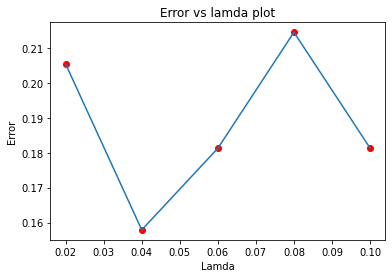


Lamda =  0.04  gives minimum error.


In [13]:
lamdaErrorList.clear()
for iterLamda in lamdaSGD:    
    for i in range(maxDegSGD+1):
        if(i != maxDegSGD):
            continue
            
        print("TESTING ERROR FOR LAMBDA = ", iterLamda)
        SGD_Error = Predict_Ridge_SGD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(SGD_Error)
        if(SGD_Error < minError):
            minError = SGD_Error
            minErrorLamda = iterLamda

plt.plot(lamdaSGD, lamdaErrorList)
plt.scatter(lamdaSGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lambda')
plt.ylabel('Error')
title = "Error vs lambda plot"
plt.title(title)
plt.show()
print("\nLambda = ", minErrorLamda, " gives minimum error.")  